In [1]:
from Pysces import *

# This work is based on the Gaussian Wavepacket Matrix Derivations by Professor Akimov.


# 1. Definition

First, the normalized gaussian wavefunction was defined:

In [2]:
alpha, gamma, x, x_0, p_0, h_b, alpha_1, alpha_2, gamma_1, gamma_2, x_1, x_2, p_1, p_2 = symbols("alpha gamma x x_0 p_0 h_b alpha_1 alpha_2 gamma_1 gamma_2 x_1 x_2 p_1 p_2")

def GAUSSIAN_NORMALIZE(alpha, gamma, x_0, p_0):
    return ((2*alpha)/pi)**(1/4) * exp(-alpha*(x - x_0)**2 + ((I*p_0)/h_b)*(x - x_0) + (I*gamma)/h_b)

GAUSSIAN_NORMALIZE(alpha_1, gamma_1, x_1, p_0)

# 2. Overlap Integral

Then, the overlap integral was defined:

In [3]:
def OVERLAP(A, B):
    return Integral(A*B, (x, -oo, oo))

We are calculating the overlap with regards to two gaussian wave packets, R and Q:

In [4]:
R = GAUSSIAN_NORMALIZE(alpha_1, gamma_1, x_1, p_1)

display(R)

Q = GAUSSIAN_NORMALIZE(alpha_2, gamma_2, x_2, p_2)

display(Q)

First, constant terms were factored out:

*Note that this is incorrect, and is missing a factored term, involving exp(). I am unsure at this time why this is.*

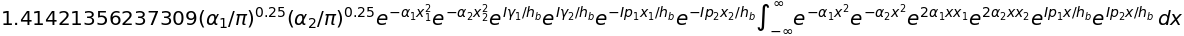

1.41421356237309*(alpha_1/pi)**0.25*(alpha_2/pi)**0.25*exp(-alpha_1*x_1**2)*exp(-alpha_2*x_2**2)*exp(I*gamma_1/h_b)*exp(I*gamma_2/h_b)*exp(-I*p_1*x_1/h_b)*exp(-I*p_2*x_2/h_b)*Integral(exp(-alpha_1*x**2)*exp(-alpha_2*x**2)*exp(2*alpha_1*x*x_1)*exp(2*alpha_2*x*x_2)*exp(I*p_1*x/h_b)*exp(I*p_2*x/h_b), (x, -oo, oo))


In [5]:
display(factor(OVERLAP(Q, R)))
print(factor(OVERLAP(Q, R)))

In [39]:
Const = 1.41421356237309*(alpha_1/pi)**0.25*(alpha_2/pi)**0.25*exp(-alpha_1*x_1**2)*exp(-alpha_2*x_2**2)*exp(I*gamma_1/h_b)*exp(I*gamma_2/h_b)*exp(-I*p_1*x_1/h_b)*exp(-I*p_2*x_2/h_b)

simplify(Const)

Please note that the numerical value is equivalent to 4^(1/4):

In [6]:
4**(1/4)

The specific term that is missing is:

Most likely this term is still within the integral. Is it possible to factor this term out? How does it affect the final answer?

In [7]:
exp(I*(alpha_2*p_1 + alpha_1*p_2)/(h_b*(alpha_1 + alpha_2)))

Continuing *without* this term leads to:

In [8]:
I = sqrt(-1)

A = ((simplify(Integral(exp(-alpha_1*x**2)*exp(-alpha_2*x**2)*exp(2*alpha_1*x*x_1)*exp(2*alpha_2*x*x_2)*exp(I*p_1*x/h_b)*exp(I*p_2*x/h_b), (x, -oo, oo)).doit())))
print(A)

Piecewise((sqrt(pi)*exp((2*alpha_1*h_b*x_1 + 2*alpha_2*h_b*x_2 + I*p_1 + I*p_2)**2/(4*alpha_1*h_b**2 + 4*alpha_2*h_b**2))/(sqrt(alpha_1)*sqrt(polar_lift(1 + alpha_2/alpha_1))), (pi/2 > Abs(arg(alpha_1) + arg((alpha_1 + alpha_2)/alpha_1))) | ((pi/2 >= Abs(arg(alpha_1) + arg((alpha_1 + alpha_2)/alpha_1))) & (pi > Abs(2*arg(alpha_1) + 2*arg(x_1) + 2*arg(1 + alpha_2*x_2/(alpha_1*x_1)) + 2*arg(1 - p_2/(alpha_1*h_b*x_1*polar_lift(2*exp_polar(I*pi/2)*polar_lift(1 + alpha_2*x_2/(alpha_1*x_1)) - p_1/(alpha_1*h_b*x_1)))) + 2*arg(2 - p_1*exp_polar(-I*pi/2)/(alpha_1*h_b*x_1*polar_lift(1 + alpha_2*x_2/(alpha_1*x_1)))))) & (pi > Abs(2*arg(alpha_1) + 2*arg(x_1) + 2*arg(1 + alpha_2*x_2/(alpha_1*x_1)) + 2*arg(1 - p_2/(alpha_1*h_b*x_1*polar_lift(2*exp_polar(I*pi/2)*polar_lift(1 + alpha_2*x_2/(alpha_1*x_1)) - p_1/(alpha_1*h_b*x_1)))) + 2*arg(2 - p_1*exp_polar(-I*pi/2)/(alpha_1*h_b*x_1*polar_lift(1 + alpha_2*x_2/(alpha_1*x_1)))) + 2*pi)))), (Integral(exp(x*(-alpha_1*h_b*x + 2*alpha_1*h_b*x_1 - alpha_2*h_b

The above output is a piecewise function. The first expression of the piecewise was copied and pasted below for clarity:

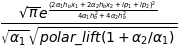

In [9]:
B = (sqrt(pi)*exp((2*alpha_1*h_b*x_1 + 2*alpha_2*h_b*x_2 + I*p_1 + I*p_2)**2/(4*alpha_1*h_b**2 + 4*alpha_2*h_b**2))/(sqrt(alpha_1)*sqrt(polar_lift(1 + alpha_2/alpha_1))))

B

*Note that for the next step (Transition Dipole Moment), it may be easier to leave it in the above form*

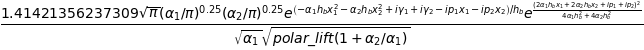

In [40]:
simplify(Const)*B

Note that the above expression is not accurate, yet it shows similar characteristics to the expression computed in the derivations.

At this time, I am not too sure about the "polar_lift()" function shown, but it seems to be something from the sympy library. If this function is ignored, the denominator may be simplified as follows:

In [11]:
simplify(sqrt(alpha_1)*sqrt(1+(alpha_2)/alpha_1))

Which is *similar* to the solved integral found in the derivations.

There are also similarities in the exponents found in the "factor(B)" cell to that of which is listed in the derivations. However, it is unable to be simplified further by python. This is an area of interest to look into.

# 3. Transition Dipole Moment

##### Let's try with the expectation values approach:

For this, we need to redefine EXPECTATION() function.

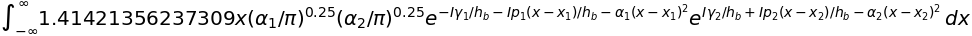

In [18]:
def EXPECTATION_NEW(A, B, C, x, y, z):
    return Integral(CONJUGATE(A)*B*C, (x, y, z))

EXPECTATION_NEW(R, x, Q, x, -oo, oo)

Note that the above is not in the correct order, but it should not matter since there are no derivatives present.

In [22]:
print(factor(EXPECTATION_NEW(R, x, Q, x, -oo, oo)))

1.41421356237309*(alpha_1/pi)**0.25*(alpha_2/pi)**0.25*exp(-alpha_1*x_1**2)*exp(-alpha_2*x_2**2)*exp(-I*gamma_1/h_b)*exp(I*gamma_2/h_b)*exp(I*p_1*x_1/h_b)*exp(-I*p_2*x_2/h_b)*Integral(x*exp(-alpha_1*x**2)*exp(-alpha_2*x**2)*exp(2*alpha_1*x*x_1)*exp(2*alpha_2*x*x_2)*exp(-I*p_1*x/h_b)*exp(I*p_2*x/h_b), (x, -oo, oo))


The above is quite complicated, but the integral can be copied and pasted into the next cell, and the constants can be left alone:

In [26]:
print(simplify(Integral(x*exp(-alpha_1*x**2)*exp(-alpha_2*x**2)*exp(2*alpha_1*x*x_1)*exp(2*alpha_2*x*x_2)*exp(-I*p_1*x/h_b)*exp(I*p_2*x/h_b), (x, -oo, oo))).doit())

Piecewise((h_b*(sqrt(pi)*alpha_1**(3/2)*x_1**3*(1 + alpha_2*x_2/(alpha_1*x_1))**3*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))**3*(1 + I*p_2/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))))**3*(sqrt(pi)*erf(sqrt(alpha_1)*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))*(1 + I*p_2/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))))/sqrt(polar_lift(1 + alpha_2/alpha_1))) + exp(-alpha_1*x_1**2*(1 + alpha_2*x_2/(alpha_1*x_1))**2*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))**2*(1 + I*p_2/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))))**2/(1 + alpha_2/alpha_1))*sqrt(polar_lift(1 + alpha_2/alpha_1))/(sqrt(alpha_1)*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_

The above is *EXTREMELY* complicated. HOWEVER, by doing ctrl+F (find function for windows), we can look for ">" symbol which indicates where the piecewise function is. The expression before this can then be copied and pasted into the next cell:

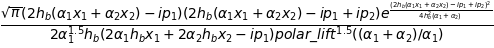

In [30]:
E = (h_b*(sqrt(pi)*alpha_1**(3/2)*x_1**3*(1 + alpha_2*x_2/(alpha_1*x_1))**3*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))**3*(1 + I*p_2/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))))**3*(sqrt(pi)*erf(sqrt(alpha_1)*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))*(1 + I*p_2/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))))/sqrt(polar_lift(1 + alpha_2/alpha_1))) + exp(-alpha_1*x_1**2*(1 + alpha_2*x_2/(alpha_1*x_1))**2*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))**2*(1 + I*p_2/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))))**2/(1 + alpha_2/alpha_1))*sqrt(polar_lift(1 + alpha_2/alpha_1))/(sqrt(alpha_1)*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))*(1 + I*p_2/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))))))*exp(alpha_1*x_1**2*(1 + alpha_2*x_2/(alpha_1*x_1))**2*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))**2*(1 + I*p_2/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))))**2/(1 + alpha_2/alpha_1))/polar_lift(1 + alpha_2/alpha_1)**(3/2) - pi*alpha_1**(3/2)*x_1**3*(1 + alpha_2*x_2/(alpha_1*x_1))**3*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))**3*(1 + I*p_2/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))))**3*exp(alpha_1*x_1**2*(1 + alpha_2*x_2/(alpha_1*x_1))**2*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))**2*(1 + I*p_2/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))))**2/(1 + alpha_2/alpha_1))/polar_lift(1 + alpha_2/alpha_1)**(3/2))/(sqrt(pi)*alpha_1*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))*(1 + I*p_2/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))))**2*(-2*alpha_1*h_b*x_1 - 2*alpha_2*h_b*x_2 + I*p_1)) - h_b*(sqrt(pi)*alpha_1**(3/2)*x_1**3*(1 + alpha_2*x_2/(alpha_1*x_1))**3*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))**3*(1 + I*p_2/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))))**3*(sqrt(pi)*erf(sqrt(alpha_1)*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))*(1 + I*p_2/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))))/sqrt(polar_lift(1 + alpha_2/alpha_1))) + exp(-alpha_1*x_1**2*(1 + alpha_2*x_2/(alpha_1*x_1))**2*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))**2*(1 + I*p_2/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))))**2/(1 + alpha_2/alpha_1))*sqrt(polar_lift(1 + alpha_2/alpha_1))/(sqrt(alpha_1)*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))*(1 + I*p_2/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))))))*exp(alpha_1*x_1**2*(1 + alpha_2*x_2/(alpha_1*x_1))**2*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))**2*(1 + I*p_2/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))))**2/(1 + alpha_2/alpha_1))/polar_lift(1 + alpha_2/alpha_1)**(3/2) + pi*alpha_1**(3/2)*x_1**3*(1 + alpha_2*x_2/(alpha_1*x_1))**3*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))**3*(1 + I*p_2/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))))**3*exp(alpha_1*x_1**2*(1 + alpha_2*x_2/(alpha_1*x_1))**2*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))**2*(1 + I*p_2/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))))**2/(1 + alpha_2/alpha_1))/polar_lift(1 + alpha_2/alpha_1)**(3/2))/(sqrt(pi)*alpha_1*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))*(1 + I*p_2/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))*(1 - I*p_1/(2*alpha_1*h_b*x_1*(1 + alpha_2*x_2/(alpha_1*x_1))))))**2*(-2*alpha_1*h_b*x_1 - 2*alpha_2*h_b*x_2 + I*p_1)))

simplify(E)

This is "simpler", yet still incredibly complicated. We know from the derivations that the Transition Dipole Moment is an expression multiplied by the overlap found in part *2*.

There are in fact similarities between the two, such as the pi term, the exp() term, and in the denominator the a_1**(3/2) and polar_lift()** (3/2) terms. It is interesting that the denominator terms are to the (3/2) power instead of (1/2) as in the overlap example.

It is of interest to find a way to automatically factor these terms out to leave the expression multipled by the overlap.

That all being said, there are similarities between this answer and the answer given in the derivations. If this was able to be simplified, it would be highly effective to use the methods described. 

Also note that, similarly to the overlap example, we have "ignored" the constants that were originally factored out of the integral. This is for simplicity, but it is not accurate to delete these terms from the expression. 

# 4. Derivative Coupling

The derivative coupling is equivalent to differentiating the second Gaussian term (the "ket" term):

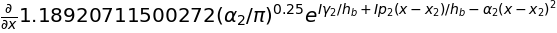

In [31]:
Derivative(Q, x)

In [32]:
Derivative(Q, x).doit()

The above term is equivalent to the ket function, Q, multiplied by the expression:

In [35]:
I = sqrt(-1)

((I*p_2)/h_b) - 2*alpha_2*(x - x_2)

This is equivalent to what is given in the derivations, and is equivalent to:

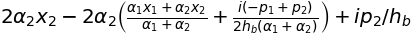

In [36]:
-2*alpha_2*mu + 2*alpha_2*x_2 + (I*p_2)/h_b

Note that this expression should be multiplied by the overlap, S_12, but this term is ommitted for clarity.

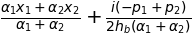

In [14]:
mu = (alpha_2*x_2 + alpha_1*x_1)/(alpha_1 + alpha_2) + I/(2*h_b)*(p_2 - p_1)/(alpha_1 + alpha_2)

mu

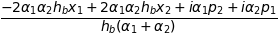

In [15]:
simplify(-2*alpha_2*mu + 2*alpha_2*x_2 + (I*p_2)/h_b)

This is equivalent to what is present in the derivations.